<a href="https://colab.research.google.com/github/shivjain123/Digit-Recognition-1_project/blob/master/Digit_Recognition_1_(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix as cfm
import seaborn as sns

In [3]:
X = np.load('image.npz')['arr_0']
Y = pd.read_csv("https://raw.githubusercontent.com/whitehatjr/datasets/master/C%20122-123/labels.csv")["labels"]
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
n_classes = len(classes)

In [ ]:
s_per_class = 4
idx_class = 0
figure = plt.figure(figsize=(n_classes*2,(1+s_per_class*2)))
for cls in classes:
  idxs = np.flatnonzero(Y == cls)
  idxs = np.random.choice(idxs, s_per_class, replace = False)
  i = 0
  for idx in idxs:
    idx_plot = i * n_classes + idx_class + 1
    p = plt.subplot(s_per_class, n_classes, idx_plot)
    p = sns.heatmap(np.reshape(X[idx], (22, 30)), cmap = plt.cm.gray, xticklabels = False, yticklabels =  False, cbar = False)
    p = plt.axis('off')
    i += 1
  idx_class += 1

In [5]:
x_train, x_test, y_train, y_test = tts(X, Y, random_state = 6, train_size = 7500, test_size = 2500)

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

In [6]:
model = LogisticRegression(solver = 'saga', multi_class = 'multinomial').fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

accuracy = acs(y_test, y_pred)

print(f"The Accuracy Score of my model is {accuracy}.")

The Accuracy Score of my model is 0.9904.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


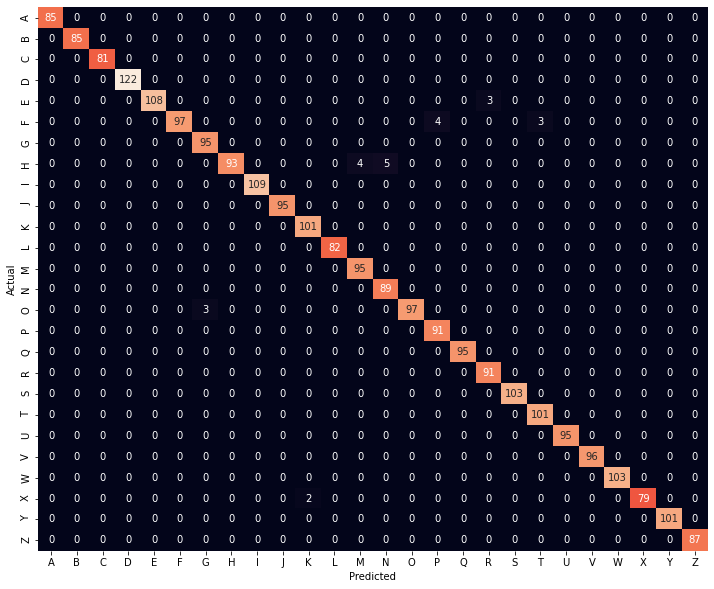

In [12]:
cm = pd.crosstab(y_test, y_pred, rownames = ["Actual"], colnames = ["Predicted"])

p = plt.figure(figsize = (12, 10))
p = sns.heatmap(cm, annot = True, fmt = "d", cbar = False)